In [1]:
import face_recognition
import cv2
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from time import sleep
import tensorflow as tf

Using TensorFlow backend.


In [3]:
import efficientnet.tfkeras
from tensorflow.keras.models import load_model

C:\Users\Admini\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [4]:
classifier = load_model('Emotion_test.h5')

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`


In [5]:
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names = {'Unknown': 0,'Akshay': 1, 'Khushal': 2}

In [6]:
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [7]:
# Load a sample picture and learn how to recognize it.
akshay_image = face_recognition.load_image_file("Akshay.jpg")
akshay_face_encoding = face_recognition.face_encodings(akshay_image)[0]

# Load a second sample picture and learn how to recognize it.
khushal_image = face_recognition.load_image_file("Khushal.jpg")
khushal_face_encoding = face_recognition.face_encodings(khushal_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    akshay_face_encoding,
    khushal_face_encoding
]
known_face_names = [
    "Akshay",
    "Khushal"
]

In [8]:
Emotion_list = []
Person_name = []
Time = []

In [10]:
video_capture = cv2.VideoCapture(0)

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
labels = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()
    
    #Emotion detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,6)
    
    for (x, y, w, h) in faces:
        #cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
        
        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)
            
            preds = classifier.predict(roi)[0]
            label = preds.argmax()
            labels.append(label)
            label_position = (x,y)

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)
            

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name, label in zip(face_locations, face_names, labels):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 30), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        overlay_text = "%s %s" % (name, class_labels[label])
        print(name, class_labels[label])
        cv2.putText(frame, overlay_text, (left + 7, bottom - 7), font, 0.8, (255, 255, 255), 1)
        
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        Time.append(current_time)
        Person_name.append(names[name])
        Emotion_list.append(label)
        

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Unknown Neutral
Unknown Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral
Akshay Neutral


# Updateing Emotion Data

In [10]:
data = {'Time':Time,
        'Person':Person_name,
        'Emotion':Emotion_list}
data = pd.DataFrame(data)

In [11]:
data.head()

,Time,Person,Emotion
0,09:30:39,1,4
1,09:30:39,1,4
2,09:30:40,1,4
3,09:30:40,1,4
4,09:30:41,1,4


In [12]:
data.shape

(83, 3)

In [15]:
data1 = pd.read_csv('Emotion_data.csv')
#data.reset_index(drop=True, inplace=True)

In [16]:
data1.head()

,Time,Person,Emotion
0,23:26:32,1,6
1,23:26:34,1,6
2,23:26:34,1,6
3,23:26:36,1,6
4,23:26:36,1,6


In [17]:
data1.shape

(452, 3)

In [18]:
data2 = pd.concat([data, data1],ignore_index=True)

In [19]:
data2.head()

,Time,Person,Emotion
0,09:30:39,1,4
1,09:30:39,1,4
2,09:30:40,1,4
3,09:30:40,1,4
4,09:30:41,1,4


In [20]:
data2.to_csv('Emotion_data.csv',index=False) 

# Data Visulization

In [21]:
data2 = pd.read_csv('Emotion_data.csv')
#data.reset_index(drop=True, inplace=True)

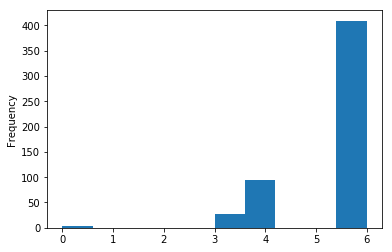

In [22]:
data2['Emotion'].plot(kind='hist')
plt.show()

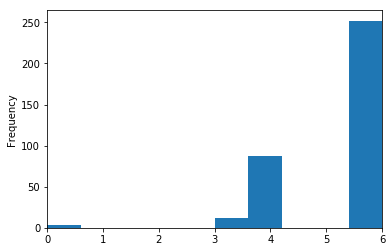

In [24]:
datax = data2[data2['Person'] == 1]
datax['Emotion'].plot(kind='hist',xlim=[0,6])
plt.show()

# Notification

In [25]:
def Notification(data):
    # inistionlization varibales
    Angry = Disgust = Fear = Happy = Sad = Surprise = Neutral = 0
    #setting values of varibales
    for i in data['Emotion']:
        if i == 0:
            Angry = Angry + 1
        elif i == 1:
            Disgust = Disgust + 1
        elif i == 2:
            Fear = Fear + 1
        elif i == 3:
            Happy = Happy + 1
        elif i == 4:
            Sad = Sad + 1
        elif i == 5:
            Surprise = Surprise + 1
        else:
            Neutral = Neutral + 1
    
    # multiplying with weigths
    Angry = Angry * 1
    Disgust = Disgust * 1.2
    Fear = Fear * 1.3
    Happy = Happy * 1
    Sad = Sad * 1.3
    Surprise = Surprise * 1
    Neutral = Neutral *0.2
    
    depression = Neutral + Sad + Disgust
    joyful = Happy + Neutral
    Aggrasive = Angry
    
    # Notification
    if depression > joyful and depression > Aggrasive:
        print('Depression')
    elif joyful > depression and joyful > Aggrasive:
        print('Good Mood')
    else:
        print("Aggression")

In [26]:
datax = data2[data2['Person'] == 1]
Notification(datax)

Depression


In [ ]:
1. Add new Face
2. collecting data
3. analysis